In [41]:
import numpy as np
import tensorflow as tf
import sklearn
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

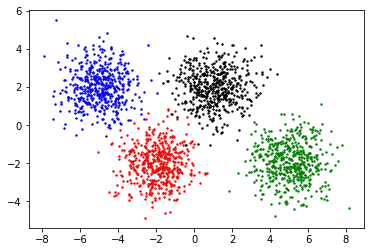

In [31]:
# Make an example dataset
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = sklearn.datasets.make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

# Plotting the example points with different colors
cat1 = y_train == 0
xCat1 = X_train[cat1]
for i in range(xCat1.shape[0]):
    plt.scatter(xCat1[i,0], xCat1[i,1], c = "blue", s=2)

cat1 = y_train == 1
xCat1 = X_train[cat1]
for i in range(xCat1.shape[0]):
    plt.scatter(xCat1[i,0], xCat1[i,1], c = "red", s=2)

cat1 = y_train == 2
xCat1 = X_train[cat1]
for i in range(xCat1.shape[0]):
    plt.scatter(xCat1[i,0], xCat1[i,1], c = "black", s=2)

cat1 = y_train == 3
xCat1 = X_train[cat1]
for i in range(xCat1.shape[0]):
    plt.scatter(xCat1[i,0], xCat1[i,1], c = "green", s=2)


In [34]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(units=25, activation="relu"),
        tf.keras.layers.Dense(units=15, activation="relu"),
        tf.keras.layers.Dense(units=4, activation="softmax") # < The No of the units should be equal to categories
    ]
)

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001)
)

model.fit(
    X_train, y_train, epochs = 10
)

Epoch 1/10
63/63 [==============================] - 1s 997us/step - loss: 0.9122
Epoch 2/10
63/63 [==============================] - 0s 938us/step - loss: 0.3432
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1750
Epoch 4/10
63/63 [==============================] - 0s 960us/step - loss: 0.1088
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0775
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0606
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0517
Epoch 8/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0453
Epoch 9/10
63/63 [==============================] - 0s 968us/step - loss: 0.0414
Epoch 10/10
63/63 [==============================] - 0s 984us/step - loss: 0.0380


In [48]:
xPredicted = model.predict(np.array([-2,-2]).reshape((1,2)))
print(xPredicted) # < Cat2 (Red)

xPredicted = model.predict(X_train)
for i in range(5):
    print( f"{xPredicted[i]}, category: {np.argmax(xPredicted[i])}")

1/1 [==============================] - 0s 21ms/step
[[1.0392922e-04 9.9940324e-01 2.8210666e-04 2.1075080e-04]]
63/63 [==============================] - 0s 1ms/step
[8.3100761e-04 3.2174238e-03 9.7257262e-01 2.3378873e-02], category: 2
[9.9619293e-01 3.7587108e-03 4.1440024e-05 6.9273378e-06], category: 0
[9.7151077e-01 2.7713930e-02 6.3471822e-04 1.4051730e-04], category: 0
[4.2101738e-04 9.9666506e-01 1.7663478e-03 1.1476249e-03], category: 1
[0.00326149 0.00193156 0.9938055  0.00100146], category: 2


In [44]:
# More numerically correct method
preferredModel = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(units=25, activation="relu"),
        tf.keras.layers.Dense(units=15, activation="relu"),
        tf.keras.layers.Dense(units=4, activation="linear")
    ]
)

preferredModel.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
)

preferredModel.fit(
    X_train, y_train, epochs=10
)

Epoch 1/10
63/63 [==============================] - 1s 1ms/step - loss: 0.7467
Epoch 2/10
63/63 [==============================] - 0s 2ms/step - loss: 0.2769
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1208
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0760
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0594
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0509
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0458
Epoch 8/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0417
Epoch 9/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0385
Epoch 10/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0366


In [46]:
predicPreferred = preferredModel.predict(X_train)
SM_predicted = tf.nn.softmax(predicPreferred).numpy()

for i in range(5):
    print( f"{predicPreferred[i]}, category: {np.argmax(predicPreferred[i])}")

63/63 [==============================] - 0s 1ms/step
[-1.7968146  -2.1313033   4.3474703   0.07988514], category: 2
[ 3.9277537 -1.1935652 -6.2274723 -4.7555604], category: 0
[ 2.8380969 -0.5217343 -4.775748  -3.807041 ], category: 0
[-1.7834536  3.858401  -1.9471194 -1.5869493], category: 1
[ 0.25859368 -4.835233    6.112734   -2.8631628 ], category: 2
